In [2]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
import csv 
import os 
import seaborn as sns 
warnings.filterwarnings('ignore')

In [3]:
#Importing data
airbnb = pd.read_csv("AB_NYC_2019.csv",error_bad_lines=False)

In [5]:
#Checking data
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
#Data Exploration
airbnb.describe()
airbnb.info()
airbnb.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
airbnb[airbnb.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [33]:
airbnb.duplicated().sum()
#there are no duplicate rows
airbnb.drop_duplicates(inplace=True)
#replace duplicates if there were duplicates

In [34]:
airbnb.fillna({'name':"No Name"}, inplace=True)
airbnb.fillna({'host_name':"No Host Name"}, inplace=True)
airbnb.fillna({'last_review':"1900-01-01"}, inplace=True)
airbnb.fillna(0,inplace=True)

<AxesSubplot:>

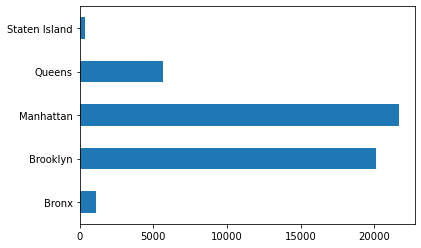

In [52]:
# Which neighborhood_group has the most AirBnB?
airbnb['neighbourhood_group'].value_counts().sort_index().plot.barh()

<AxesSubplot:>

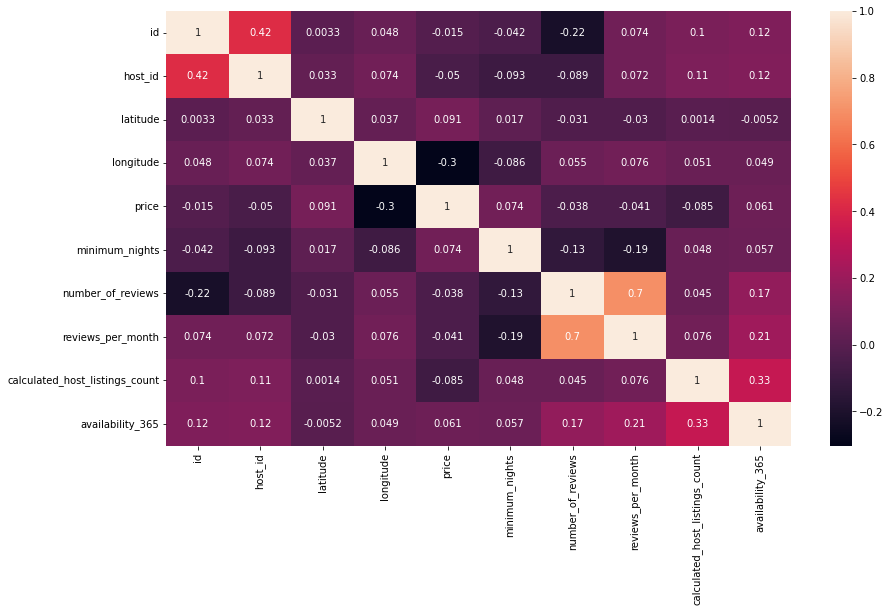

In [66]:
#Checking for correlation
corr = airbnb.corr(method='kendall') 
#we choose kendall because we do not have to assume parametric assumptions (do not assume linear relationship)

plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

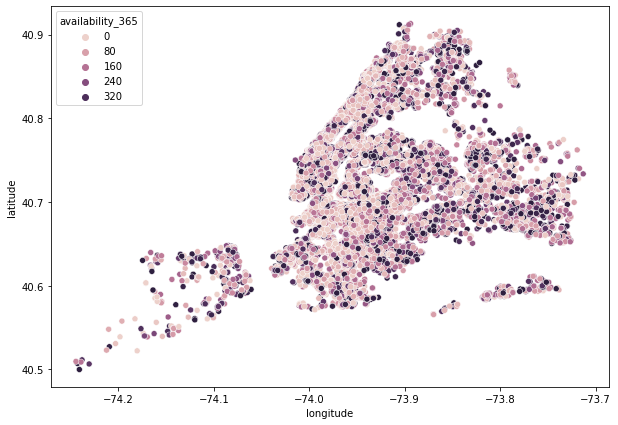

In [70]:
plt.figure(figsize=(10,7))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365) 

<Figure size 720x504 with 0 Axes>

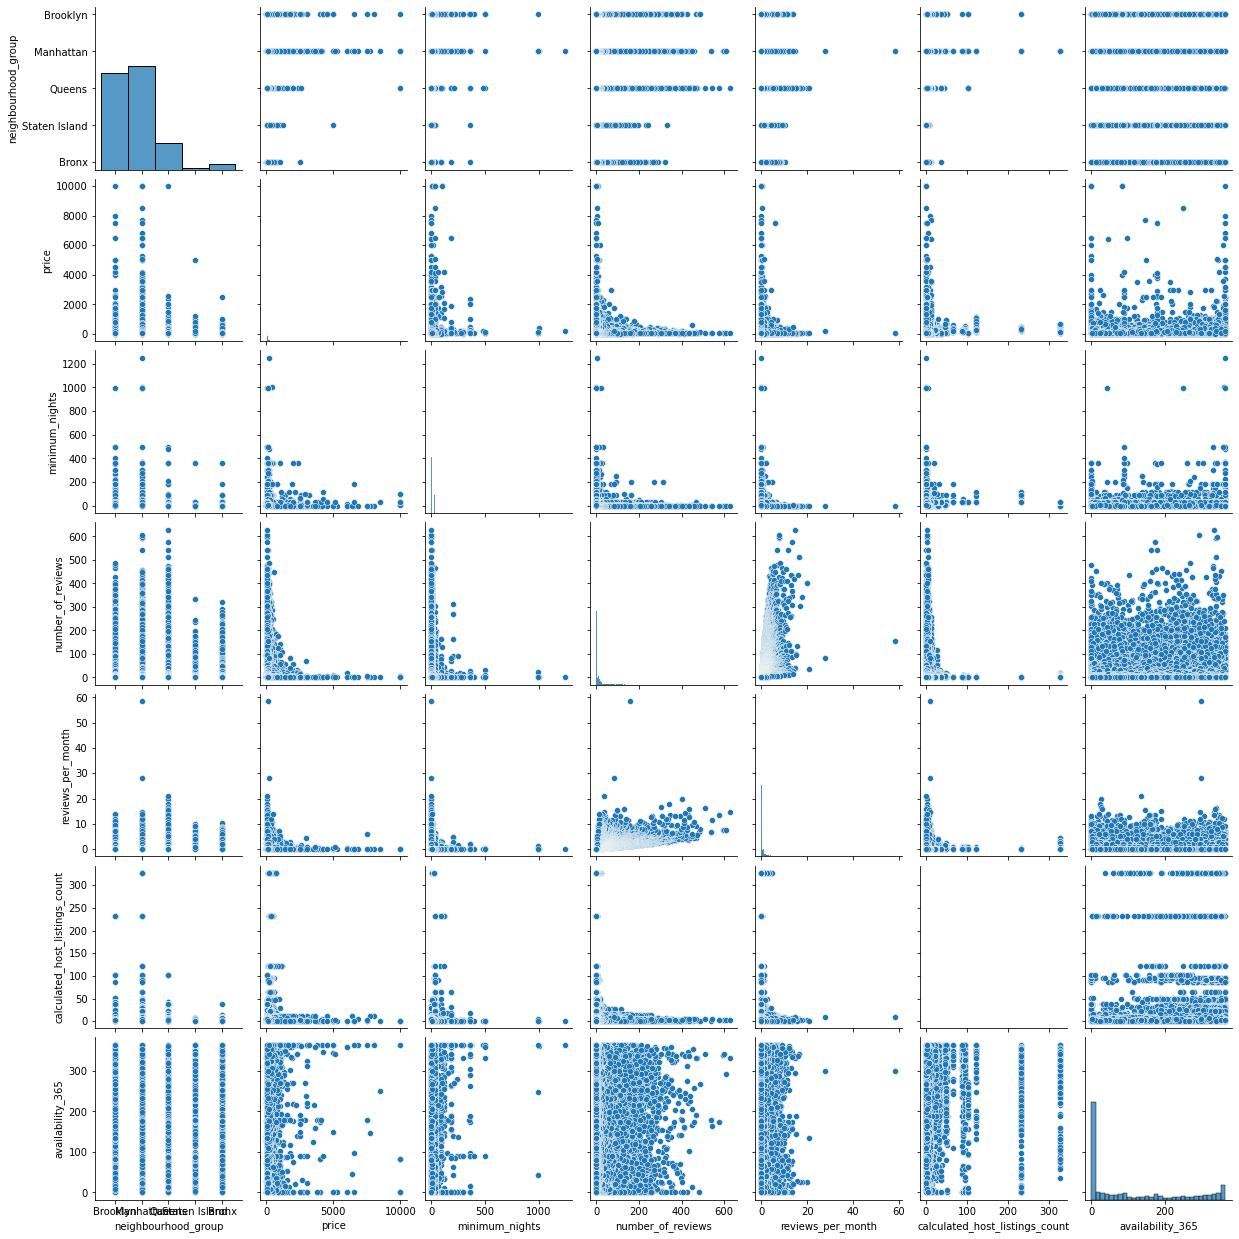

In [82]:
plt.figure(figsize=(10,7))
sns.pairplot(airbnb, x_vars=['neighbourhood_group','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'], y_vars=['neighbourhood_group','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'])

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [90]:
labelencoder = LabelEncoder()
#creating a labelencoder object/Can only be performed on object data types
airbnb['neighbourhood_group'] = labelencoder.fit_transform(airbnb['neighbourhood_group'])
airbnb['neighbourhood'] = labelencoder.fit_transform(airbnb['neighbourhood'])
airbnb['room_type'] = labelencoder.fit_transform(airbnb['room_type'])


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,1,108,40.64749,-73.97237,1,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,2,127,40.75362,-73.98377,0,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,94,40.80902,-73.94190,1,150,3,0,1900-01-01,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,41,40.68514,-73.95976,0,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,61,40.79851,-73.94399,0,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,2,137,40.74767,-73.97500,0,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,1,13,40.68688,-73.95596,1,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,2,95,40.76489,-73.98493,1,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,2,202,40.80178,-73.96723,1,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,2,35,40.71344,-73.99037,0,150,1,160,2019-06-09,1.33,4,188


In [93]:
airbnb['neighbourhood_group'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [122]:
x = airbnb.iloc[:,[5,8,10,14,15]]
y = airbnb.price

In [123]:
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.3,random_state=353)

In [134]:
# instantiate, fit
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [136]:
y_pred = linreg.predict(x_test) 
print('Accuracy on test set: {}'.format(linreg.score(x_test, y_test)))
print(linreg.intercept_,linreg.coef_)

Accuracy on test set: 0.09396867207389459
170.68232147820123 [ 1.85418020e-01 -1.09856868e+02  4.46695176e-02  5.96216061e-02
  1.59614390e-01]


In [137]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
mod = sm.OLS(y_train,x_train)
fii = mod.fit()
fii.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
=====================================================================================
Model:                     OLS                   Adj. R-squared:          0.066      
Dependent Variable:        price                 AIC:                     474044.2084
Date:                      2022-02-27 20:52      BIC:                     474094.8529
No. Observations:          34226                 Log-Likelihood:          -2.3702e+05
Df Model:                  5                     F-statistic:             485.4      
Df Residuals:              34220                 Prob (F-statistic):      0.00       
R-squared:                 0.066                 Scale:                   60619.     
-------------------------------------------------------------------------------------
                                 Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------------------------
const                           170.6823   3.0951  55.1468 0.0000  164.6159  176.7487
neighbourhood                     0.1854   0.0194   9.5342 0.0000    0.1473    0.2235
room_type                      -109.8569   2.4607 -44.6447 0.0000 -114.6799 -105.0338
minimum_nights                    0.0447   0.0725   0.6157 0.5381   -0.0975    0.1869
calculated_host_listings_count    0.0596   0.0421   1.4170 0.1565   -0.0228    0.1421
availability_365                  0.1596   0.0105  15.2491 0.0000    0.1391    0.1801
-------------------------------------------------------------------------------------
Omnibus:                  76560.990          Durbin-Watson:             2.006        
Prob(Omnibus):            0.000              Jarque-Bera (JB):          589414620.899
Skew:                     21.028             Prob(JB):                  0.000        
Kurtosis:                 644.515            Condition No.:             494          
=====================================================================================

"""

In [144]:
predictions = linreg.predict(x_test)
error=pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
error['prediction']=np.array(predictions)
error.head(10)

,actual,prediction
0,99,142.647407
1,75,199.184325
2,260,226.809847
3,200,194.394323
4,135,144.439821
5,35,27.208397
6,225,197.410508
7,35,-37.741637
8,280,237.182088
9,125,214.743998
